## Data visualization from global scale.

In [4]:
import sys
sys.path.append("/Users/luo/OneDrive/SAR-Altimetry/sentinel3-altimetry-l2/utils")
import matplotlib.pyplot as plt
import xarray as xr
from osgeo import gdal
from coor_convert import geo2imagexy
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [7]:
root_dir = '/Users/luo/OneDrive/SAR-Altimetry/sentinel3-altimetry-l2'
## s3 data
path_s3al2_260 = root_dir+'/data/s3a-relative-orbit-260/S3A_SR_2_WAT____20190121T021825_20190121T030242_20191218T104655_2657_040_260______MR1_R_NT_004.SEN3/enhanced_measurement.nc'
path_s3al2_309 = root_dir+'/data/s3a-relative-orbit-309/S3A_SR_2_WAT____20190124T133954_20190124T142746_20191218T110840_2872_040_309______MR1_R_NT_004.SEN3/enhanced_measurement.nc'
path_s3al2_209_land = root_dir+'/data/s3a-relative-orbit-209-land/S3A_SR_2_LAN____20201122T131839_20201122T140907_20201217T210526_3028_065_209______LN3_O_NT_004.SEN3/enhanced_measurement.nc'
path_s3al2_246_land = root_dir+'/data/s3a-relative-orbit-246-land/S3A_SR_2_LAN____20190920T024711_20190920T033508_20191015T202501_2877_049_246______LN3_O_NT_003.SEN3/enhanced_measurement.nc'
path_s3al2_309_land = root_dir+'/data/s3a-relative-orbit-309-land/S3A_SR_2_LAN____20190512T133726_20190512T142755_20190606T233806_3029_044_309______LN3_O_NT_003.SEN3/enhanced_measurement.nc'

## tgauge data
path_tguage_obser = root_dir+'/data/tgauge_data/observatory_hk/tgauge_obser.nc'

## parameter
land_resolution = '50m'


In [8]:
## 1. s3l2 altimetry data
s3al2_260 = xr.open_dataset(path_s3al2_260)
s3al2_309 = xr.open_dataset(path_s3al2_309)
s3bl2_209_land = xr.open_dataset(path_s3al2_209_land)
s3bl2_246_land = xr.open_dataset(path_s3al2_246_land)
s3bl2_309_land = xr.open_dataset(path_s3al2_309_land)

## 2. tgauge data
tguage_obser = xr.open_dataset(path_tguage_obser)


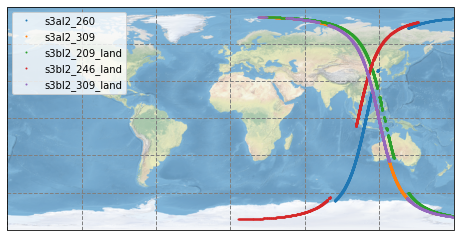

In [33]:
proj = ccrs.PlateCarree(central_longitude=0.0)
extent = [110, 120, 15, 30]
s3l2_data = [s3al2_260, s3al2_309, s3bl2_209_land, s3bl2_246_land, s3bl2_309_land]
s3l2_label = ['s3al2_260', 's3al2_309', 's3bl2_209_land', 's3bl2_246_land', 's3bl2_309_land']
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)
ax.stock_img()
for i, s3l2 in enumerate(s3l2_data):
    ax.plot(s3l2['lon_01'], s3l2['lat_01'], marker='.', markersize=2, 
    linewidth=0.0, label=s3l2_label[i])
ax.gridlines(linewidth=1, color='gray', linestyle='--')
ax.legend()
# ax.set_extent(extent, crs=proj)
